## Set-up

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt


In [44]:
category = [
    'age',
    'workclass',
    'fnlwgt',
    'education',
    'education-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'income'
]

In [45]:
test_data = pd.read_csv('adult_test.csv', names=category);
test_data;

## Imputation

In [46]:
# deal with ?
# in workclass, occupation, native-country

# workclass: replace by most frequent workclass -- Private
test_data['workclass'] = test_data['workclass'].replace(' ?', ' Private')

# occupation: replace by most frequent occupation -- Prof-specialty
test_data['occupation'] = test_data['occupation'].replace(' ?', ' Prof-specialty')

# occupation: replace by most frequent native-country -- United-States
test_data['native-country'] = test_data['native-country'].replace(' ?', ' United-States')



## Feature Engineering

In [47]:
test_data.dtypes
# The code below will transfer all the string into int to smoothen the processing

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
income            object
dtype: object

In [48]:
# age group

''' 
Reference:
<21 => 0
21-30 => 1
31-40 => 2
41-50 => 3
51-60 => 4
61-70 => 5
71-80 => 6
81-90 => 7
'''

test_data['age'] = test_data['age'].astype(int)
test_data['age'] = test_data['age'].mask(test_data['age'] < 21, 0)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 21) & (test_data['age'] < 31), 1)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 31) & (test_data['age'] < 41), 2)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 41) & (test_data['age'] < 51), 3)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 51) & (test_data['age'] < 61), 4)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 61) & (test_data['age'] < 71), 5)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 71) & (test_data['age'] < 81), 6)
test_data['age'] = test_data['age'].mask((test_data['age'] >= 81), 7)

test_data['age'].value_counts()

2    4292
1    4008
3    3420
4    2074
0    1213
5     946
6     279
7      49
Name: age, dtype: int64

In [49]:
# workclass
''' 
Reference:
Without pay => 0
Never-worked => 1
Self-emp-inc => 2
Self-emp-not-inc => 3
Federal-gov => 4
State-gov => 5
Local-gov => 6
Private => 7
'''
test_data['workclass'] = test_data['workclass'].replace(' Without-pay', 0)
test_data['workclass'] = test_data['workclass'].replace(' Never-worked', 1)
test_data['workclass'] = test_data['workclass'].replace(' Self-emp-inc', 2)
test_data['workclass'] = test_data['workclass'].replace(' Self-emp-not-inc', 3)
test_data['workclass'] = test_data['workclass'].replace(' Federal-gov', 4)
test_data['workclass'] = test_data['workclass'].replace(' State-gov', 5)
test_data['workclass'] = test_data['workclass'].replace(' Local-gov', 6)
test_data['workclass'] = test_data['workclass'].replace(' Private', 7)

test_data['workclass'].value_counts()

7    12173
3     1321
6     1043
5      683
2      579
4      472
0        7
1        3
Name: workclass, dtype: int64

In [50]:
# education
''' 
education and education-num are same thing so just combine them together

Reference:
Pre-school, 1st - 12th => Not finished high school => 0
HS-grad => finished high school => 1 
Asso-acdm, Asso-voc, Some-college => Asso & not finished UG => 2
Bachelors => 3
Masters, Doctorate, Prof-school => Post-grad => 4
'''
test_data['education-num'] = test_data['education-num'].replace([1, 2, 3, 4, 5, 6, 7, 8], 0)
test_data['education-num'] = test_data['education-num'].replace(9, 1)
test_data['education-num'] = test_data['education-num'].replace([10, 11, 12], 2)
test_data['education-num'] = test_data['education-num'].replace(13, 3)
test_data['education-num'] = test_data['education-num'].replace([14, 15, 16], 4)

test_data = test_data.drop(columns = ['education'])
test_data = test_data.rename(columns={'education-num':'education'})

test_data['education'].value_counts()

1    5283
2    4800
3    2670
0    2155
4    1373
Name: education, dtype: int64

In [51]:
# occupation
''' 
Reference:
'Tech-support', 'Craft-repair', 'Other-service', 'Sales', 'Exec-managerial', 'Prof-specialty', 'Handlers-cleaners', 'Machine-op-inspct', 'Adm-clerical', 'Farming-fishing', 'Transport-moving', 'Priv-house-serv', 'Protective-serv', 'Armed-Forces'
= [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
'''
test_data['occupation'] = test_data['occupation'].replace([' Tech-support', ' Craft-repair', ' Other-service', ' Sales', ' Exec-managerial', ' Prof-specialty', ' Handlers-cleaners', ' Machine-op-inspct', ' Adm-clerical', ' Farming-fishing', ' Transport-moving', ' Priv-house-serv', ' Protective-serv', ' Armed-Forces'], range(14))



test_data['occupation'].value_counts()



5     2998
4     2020
1     2013
3     1854
8     1841
2     1628
7     1020
10     758
6      702
0      518
9      496
12     334
11      93
13       6
Name: occupation, dtype: int64

In [52]:
# relationship
''' 
Reference:
'Wife', 'Own-child', 'Husband', 'Not-in-family', 'Other-relative', 'Unmarried'
= [0, 1, 2, 3, 4, 5]
'''
test_data['relationship'] = test_data['relationship'].replace([' Wife', ' Own-child', ' Husband', ' Not-in-family', ' Other-relative', ' Unmarried'], range(6))

test_data['relationship'].value_counts()

2    6523
3    4278
1    2513
5    1679
0     763
4     525
Name: relationship, dtype: int64

In [53]:
# race
''' 
Reference:
'White', 'Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other', 'Black'Have capital gain => 1
= [0, 1, 2, 3, 4]
'''

test_data['race'] = test_data['race'].replace([' White', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo', ' Other', ' Black'], range(5))

test_data['race'].value_counts()


0    13946
4     1561
1      480
2      159
3      135
Name: race, dtype: int64

In [54]:
# sex
''' 
Reference:
Female, Male
= [0, 1]
'''

test_data['sex'] = test_data['sex'].replace([' Female', ' Male'], range(2))

test_data['sex'].value_counts()


1    10860
0     5421
Name: sex, dtype: int64

In [55]:
# capital-gain
''' 
Reference:
No capital gain => 0
Have capital gain => 1
'''
#test_data['capital-gain'] = test_data['capital-gain'].astype(int)
test_data['capital-gain'] = test_data['capital-gain'].mask(test_data['capital-gain'] == 0, 0)
test_data['capital-gain'] = test_data['capital-gain'].mask(test_data['capital-gain'] > 0, 1)

test_data['capital-gain'].value_counts()

0    14958
1     1323
Name: capital-gain, dtype: int64

In [56]:
# capital-loss
''' 
Reference:
No capital loss => 0
Have capital loss => 1
'''
test_data['capital-loss'] = test_data['capital-loss'].astype(int)
test_data['capital-loss'] = test_data['capital-loss'].mask(test_data['capital-loss'] == 0, 0)
test_data['capital-loss'] = test_data['capital-loss'].mask(test_data['capital-loss'] > 0, 1)

test_data['capital-loss'].value_counts()



0    15518
1      763
Name: capital-loss, dtype: int64

In [57]:
# hours-per-week
''' 
Reference:
0-20 => 0
21-40 => 1
41-60 => 2
61+ => 3
'''
test_data['hours-per-week'] = test_data['hours-per-week'].astype(int)
test_data['hours-per-week'] = test_data['hours-per-week'].mask(test_data['hours-per-week'] < 21, 0)
test_data['hours-per-week'] = test_data['hours-per-week'].mask((test_data['hours-per-week'] >= 21) & (test_data['hours-per-week'] < 41), 1)
test_data['hours-per-week'] = test_data['hours-per-week'].mask((test_data['hours-per-week'] >= 41) & (test_data['hours-per-week'] < 61), 2)
test_data['hours-per-week'] = test_data['hours-per-week'].mask(test_data['hours-per-week'] >= 61, 3)

test_data['hours-per-week'].value_counts()


1    9985
2    4205
0    1525
3     566
Name: hours-per-week, dtype: int64

In [58]:
# native-country
''' 
Reference:
United-State => 0
Any other non-US => 1
'''
test_data['native-country'] = test_data['native-country'].mask(test_data['native-country']!=' United-States', 1)
test_data['native-country'] = test_data['native-country'].mask(test_data['native-country']==' United-States', 0)

test_data['native-country'].value_counts()

0    14936
1     1345
Name: native-country, dtype: int64

In [59]:
# marital-status
''' 
Reference:
Never-married => 0
Married AF or Civ => 1
Married-spouse-absent, divorced, seperated, widowed => Broken relationship => 2
'''
test_data['marital-status'] = test_data['marital-status'].replace(' Never-married', 0)
test_data['marital-status'] = test_data['marital-status'].replace([' Married-AF-spouse', ' Married-civ-spouse'], 1)
test_data['marital-status'] = test_data['marital-status'].replace([' Married-spouse-absent', ' Divorced', ' Separated', ' Widowed'], 2)

test_data['marital-status'].value_counts()



1    7417
0    5434
2    3430
Name: marital-status, dtype: int64

In [60]:
# income
''' 
Reference:
<=50k => 0
>50k => 1
'''

test_data['income'] = test_data['income'].replace(' <=50K.', 0)
test_data['income'] = test_data['income'].replace(' >50K.', 1)


test_data['income'].value_counts()


0    12435
1     3846
Name: income, dtype: int64

<AxesSubplot:>

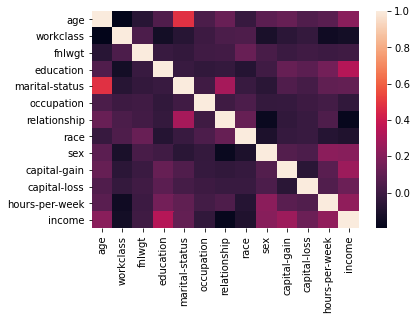

In [61]:
sns.heatmap(test_data.corr())

In [62]:
test_data

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,1,7,226802,0,0,7,1,4,1,0,0,1,0,0
1,2,7,89814,1,1,9,2,0,1,0,0,2,0,0
2,1,6,336951,2,1,12,2,0,1,0,0,1,0,1
3,3,7,160323,2,1,7,2,4,1,1,0,1,0,1
4,0,7,103497,2,0,5,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,2,7,215419,3,2,5,3,0,0,0,0,1,0,0
16277,5,7,321403,1,2,5,4,4,1,0,0,1,0,0
16278,2,7,374983,3,1,5,2,0,1,0,0,2,0,0
16279,3,7,83891,3,2,8,1,1,1,1,0,1,0,0


In [63]:
test_data.to_csv('clean_test_data.csv', index=False)

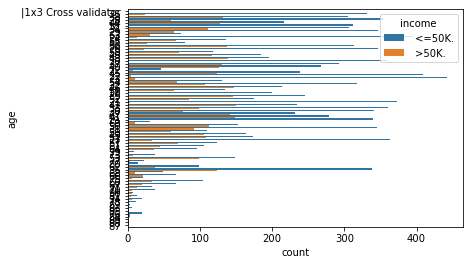